In [ ]:
# default_exp core

In [ ]:
#export
from fastai.basics import *
from fastai.vision.all import *

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
TEST_IMAGE = 'images/puppy.jpg'

# Core
> General utils.

In [ ]:
#export
def zip_safe(*args, **kwargs):
  'Raises ValueError is len of items are different. Does not work for generators'
  if len(set([len(o) for o in args])) != 1: raise ValueError('All items should have same length')
  return zip(*args, **kwargs)

In [ ]:
test_eq(list(zip_safe([1,2],[3,4])), [(1,3),(2,4)])
test_fail(lambda: zip_safe([1,2],[3]))

## Torch core

In [ ]:
#export
def _wmean(t:Tensor, w=None, dim=None):
  'Weighted mean'
  if w is None: return t.mean(dim=dim)
  w = tensor(w, device=t.device)
  assert w.sum(dim).mean() == 1., 'weights must sum to 1'
  if dim is not None:
    set_trace()
    assert len(w) == t.shape[dim], 'weights must have the same number of items as chosen dimension'
    sz = torch.ones(len(t.shape), dtype=int)
    sz[dim] = t.shape[dim]
  else:
    assert len(w) == torch.prod(tensor(t.shape))
    sz = t.shape
  w = w.reshape(*sz)
  if dim is not None:  return (w*t).sum(dim=dim) #TODO: dim=None gives error
  else:                return (w*t).sum()

In [ ]:
#export
@patch
@delegates(_wmean)
def wmean(self:Tensor, w, **kwargs): return _wmean(self, w, **kwargs)

In [ ]:
# t = tensor([2., 4.])
# w = [.2, .8]
# test_close(t.wmean(w), 3.6)
# test_close(t.wmean(w, dim=0), 3.6)
# test_close(t.to(default_device()).wmean(w), 3.6)

In [ ]:
# t = tensor([
#   [2., 4.],
#   [20., 40.],
#   [200., 400.],
# ])
# test_close(t.wmean([.2, .8], dim=1), tensor([3.6, 36., 360.]))
# test_close(t.wmean([.1, .4, .5], dim=0), tensor([108.2,216.4]))
# test_close(t.wmean([.1, .1, .3, .2, .1, .2]), 114.6)

## TensorImage

In [ ]:
#export
@patch_to(TensorImage)
def create(fn) -> TensorImage:
  pipe = Pipeline([PILImage.create, ToTensor(), IntToFloatTensor()])
  return pipe(fn).to(default_device())

<AxesSubplot:>

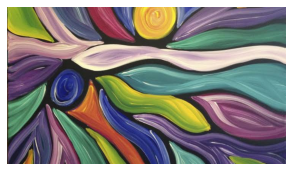

In [ ]:
tim = TensorImage.create('../examples/styles/abstract.jpg')
tim.show()

## Export -

In [ ]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_data.ipynb.
Converted 02_layer_features.ipynb.
Converted 03_loss.ipynb.
Converted 04_models.ipynb.
Converted 05_learner.ipynb.
Converted 06_callback.ipynb.
Converted index.ipynb.
